Install Prequisites (fhirpathpy and requests, the ! indicates we are going out to the shell)

In [28]:
!pip install fhirpathpy
!pip install requests

Get the Evaluation function from the fhirpathpy library

In [79]:
from fhirpathpy import evaluate

Get requests and requests.auth to make Rest Request to our FHIR server

In [30]:
import requests
from requests.auth import HTTPBasicAuth

Set up the headers for all subsequent server requests

In [31]:
headers = {
    "Accept": "*/*",
    "content-type": "application/fhir+json",
    "Accept-Encoding": "gzip, deflate, br",
    "Prefer": "return=representation"
}

Define the FHIR Search URL that found all the values of HgA1c on your patient

In [ ]:
url="http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Observation?subject=Patient/12251&code=http://loinc.org|4548-4&value-quantity=ge6.0"

Now execute your FHIR Search REST Requests from Juypter Notebooks

In [7]:
response = requests.get(url, headers=headers, auth=HTTPBasicAuth('_System', 'ISCDEMO'))

In [8]:
# Check if the request was successful
if response.status_code == 200:
    bundle = response.json()
    print("Bundle retrieved successfully!")
else:
    print("Failed to retrieve bundle")

Bundle retrieved successfully!


Now write your FHIRPath expression to extract all the Hemoglobin A1c as an array, remember the format for getting FHIRPath results is 
result = evaluate(bundle, expression, []) 
Your job is to fill in the expression.

In [62]:
expression = "entry.resource.ofType(Observation).valueQuantity.value"
result1 = evaluate(bundle, expression, [])
print("This is result1:")
print(result1)
hba1c_values = [entry["resource"]["valueQuantity"]["value"] for entry in bundle["entry"]]
# Print the extracted values
print(hba1c_values)



This is result1:
[Decimal('92.67'), Decimal('93.86'), Decimal('93.36'), Decimal('92.09'), Decimal('94.14'), Decimal('92.46'), Decimal('92.94'), Decimal('93.23'), Decimal('91.84'), Decimal('93.69'), Decimal('93.09'), Decimal('92.52'), Decimal('94.08'), Decimal('93.21')]
[Decimal('92.67'), Decimal('93.86'), Decimal('93.36'), Decimal('92.09'), Decimal('94.14'), Decimal('92.46'), Decimal('92.94'), Decimal('93.23'), Decimal('91.84'), Decimal('93.69'), Decimal('93.09'), Decimal('92.52'), Decimal('94.08'), Decimal('93.21')]


Sort the array using Python

In [67]:
hba1c_values = [str(d) for d in hba1c_values]
hba1c_sorted = sorted(set(hba1c_values))  # set() ensures unique values, sorted() sorts them

# Step 3: Print results
print(hba1c_sorted)

['91.84', '92.09', '92.46', '92.52', '92.67', '92.94', '93.09', '93.21', '93.23', '93.36', '93.69', '93.86', '94.08', '94.14']


Use fhirpath to extract all the FHIR ids for patients with Pre-Diabetes.

In [19]:
url = "http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Patient?_has:Condition:patient:code=http://snomed.info/sct|15777000"

In [86]:
response = requests.get(url, headers=headers, auth=HTTPBasicAuth('_System', 'ISCDEMO'))

In [87]:
# Check if the request was successful
if response.status_code == 200:
    bundle = response.json()
    print("Bundle retrieved successfully!")
else:
    print("Failed to retrieve bundle")

Bundle retrieved successfully!


Get all the Patient ids (FHIR Ids) of those with Pre-Diabetes

In [94]:
response_data = response.json()  # Assuming the response is JSON
print(response_data) 

{'resourceType': 'Bundle', 'id': 'dc1036c0-036b-11f0-9076-0242c0a8cc22', 'type': 'searchset', 'timestamp': '2025-03-17T20:10:23Z', 'total': 14, 'link': [{'relation': 'self', 'url': 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Observation?code=http%3A%2F%2Floinc.org%7C29463-7&subject=Patient%2F70255'}], 'entry': [{'fullUrl': 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Observation/70261', 'resource': {'resourceType': 'Observation', 'status': 'final', 'category': [{'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/observation-category', 'code': 'vital-signs', 'display': 'Vital Signs'}]}], 'code': {'coding': [{'system': 'http://loinc.org', 'code': '29463-7', 'display': 'Body Weight'}], 'text': 'Body Weight'}, 'subject': {'reference': 'Patient/70255'}, 'effectiveDateTime': '2025-03-01T08:00:00Z', 'valueQuantity': {'value': 92.67, 'unit': 'kg', 'system': 'http://unitsofmeasure.org', 'code': 'kg'}, 'device': {'reference': 'Device/66478'}, 'id': '70261', 'meta': {'las

In [93]:
expression = "entry.resource.id"
result = evaluate(response_data, expression, [])
patientIds = [entry["resource"]["id"] for entry in bundle["entry"]]
print("using FHIRPATH")
print(result)
print("using PYTHON")
print(patientIds)
# Step 2: Remove duplicates and sort, use pure python since this FHIRPathy library does not supprt sort
#pre_diabetes_sorted_ids = sorted(set(patientIds))  # set() ensures unique values, sorted() sorts them

# Step 3: Print results
#print(pre_diabetes_sorted_ids)

using FHIRPATH
['70261', '70262', '70263', '70264', '70265', '70266', '70267', '70268', '70269', '70270', '70271', '70272', '70273', '70274']
using PYTHON
['70261', '70262', '70263', '70264', '70265', '70266', '70267', '70268', '70269', '70270', '70271', '70272', '70273', '70274']


In [90]:
response_data = response.json()  # Assuming the response is JSON
print(response_data) 

{'resourceType': 'Bundle', 'id': 'dc1036c0-036b-11f0-9076-0242c0a8cc22', 'type': 'searchset', 'timestamp': '2025-03-17T20:10:23Z', 'total': 14, 'link': [{'relation': 'self', 'url': 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Observation?code=http%3A%2F%2Floinc.org%7C29463-7&subject=Patient%2F70255'}], 'entry': [{'fullUrl': 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Observation/70261', 'resource': {'resourceType': 'Observation', 'status': 'final', 'category': [{'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/observation-category', 'code': 'vital-signs', 'display': 'Vital Signs'}]}], 'code': {'coding': [{'system': 'http://loinc.org', 'code': '29463-7', 'display': 'Body Weight'}], 'text': 'Body Weight'}, 'subject': {'reference': 'Patient/70255'}, 'effectiveDateTime': '2025-03-01T08:00:00Z', 'valueQuantity': {'value': 92.67, 'unit': 'kg', 'system': 'http://unitsofmeasure.org', 'code': 'kg'}, 'device': {'reference': 'Device/66478'}, 'id': '70261', 'meta': {'las

Get all the ids of patients with high hemoglobin A1cs  (i.e. 6.0 or higher)

In [ ]:
url = 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Patient?_has:Observation:subject:code=http://loinc.org|4548-4&_has:Observation:subject:value-quantity=ge6.0'

In [80]:
response = requests.get(url, headers=headers, auth=HTTPBasicAuth('_System', 'ISCDEMO'))
# Check if the request was successful
if response.status_code == 200:
    bundle = response.json()
    print("Bundle retrieved successfully!")
else:
    print("Failed to retrieve bundle")

Bundle retrieved successfully!


In [22]:
expression = "bundle.entry.resource.ofType(Patient).id"
result = evaluate(bundle, expression, [])
patientIds = [entry["resource"]["id"] for entry in bundle["entry"]]
# Step 2: Remove duplicates and sort, use pure python since this FHIRPathy library does not supprt sort
highHgB_sorted_ids = sorted(set(patientIds))  # set() ensures unique values, sorted() sorts them

# Step 3: Print results
print(highHgB_sorted_ids)

['12251', '1409', '14310', '15421', '2049', '2175', '22390', '23507', '24744', '26660', '27052', '29917', '37884', '39245', '39312', '46101', '49946', '50345', '5331', '54054', '5691', '56963', '57128', '57374', '57547', '57827', '59239', '61584', '7', '9250']


In [23]:
def compare_lists(list1, list2):
    """
    Compare two lists and return elements that are unique to each list.
    """
    set1 = set(list1)
    set2 = set(list2)
    
    only_in_list1 = sorted(set1 - set2)
    only_in_list2 = sorted(set2 - set1)
    
    return only_in_list1, only_in_list2

In [25]:
only_in_pre_diabetes, only_in_highHgB = compare_lists(pre_diabetes_sorted_ids, highHgB_sorted_ids)

In [26]:
print(only_in_pre_diabetes)

[]


In [27]:
print(only_in_highHgB)

[]


Get all the Weights of John Herrington

In [32]:
url="http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Observation?code=http://loinc.org|29463-7&subject=Patient/70255"

In [33]:
response = requests.get(url, headers=headers, auth=HTTPBasicAuth('_System', 'ISCDEMO'))
# Check if the request was successful
if response.status_code == 200:
    bundle = response.json()
    print("Bundle retrieved successfully!")
else:
    print("Failed to retrieve bundle")

Bundle retrieved successfully!


In [47]:
expression = "Bundle.entry.resource.where(resourceType='Observation' and code.coding.code='29463-7').select(valueQuantity.value.toString() + ' | ' + effectiveDateTime)"
result = evaluate(bundle, expression, [])
print(result)

['92.67 | 2025-03-01T08:00:00Z', '93.86 | 2025-03-02T08:00:00Z', '93.36 | 2025-03-03T08:00:00Z', '92.09 | 2025-03-04T08:00:00Z', '94.14 | 2025-03-05T08:00:00Z', '92.46 | 2025-03-06T08:00:00Z', '92.94 | 2025-03-07T08:00:00Z', '93.23 | 2025-03-08T08:00:00Z', '91.84 | 2025-03-09T08:00:00Z', '93.69 | 2025-03-10T08:00:00Z', '93.09 | 2025-03-11T08:00:00Z', '92.52 | 2025-03-12T08:00:00Z', '94.08 | 2025-03-13T08:00:00Z', '93.21 | 2025-03-14T08:00:00Z']


In [48]:
# Convert delimited string into tuples
parsed_data = [(float(weight), date) for weight, date in (item.split(" | ") for item in result)]

# Print the structured result
print(parsed_data)

[(92.67, '2025-03-01T08:00:00Z'), (93.86, '2025-03-02T08:00:00Z'), (93.36, '2025-03-03T08:00:00Z'), (92.09, '2025-03-04T08:00:00Z'), (94.14, '2025-03-05T08:00:00Z'), (92.46, '2025-03-06T08:00:00Z'), (92.94, '2025-03-07T08:00:00Z'), (93.23, '2025-03-08T08:00:00Z'), (91.84, '2025-03-09T08:00:00Z'), (93.69, '2025-03-10T08:00:00Z'), (93.09, '2025-03-11T08:00:00Z'), (92.52, '2025-03-12T08:00:00Z'), (94.08, '2025-03-13T08:00:00Z'), (93.21, '2025-03-14T08:00:00Z')]


In [49]:
from datetime import datetime

# Convert date string to datetime object
parsed_data = [(weight, datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ")) for weight, date in parsed_data]

# Print the structured result
print(parsed_data)

[(92.67, datetime.datetime(2025, 3, 1, 8, 0)), (93.86, datetime.datetime(2025, 3, 2, 8, 0)), (93.36, datetime.datetime(2025, 3, 3, 8, 0)), (92.09, datetime.datetime(2025, 3, 4, 8, 0)), (94.14, datetime.datetime(2025, 3, 5, 8, 0)), (92.46, datetime.datetime(2025, 3, 6, 8, 0)), (92.94, datetime.datetime(2025, 3, 7, 8, 0)), (93.23, datetime.datetime(2025, 3, 8, 8, 0)), (91.84, datetime.datetime(2025, 3, 9, 8, 0)), (93.69, datetime.datetime(2025, 3, 10, 8, 0)), (93.09, datetime.datetime(2025, 3, 11, 8, 0)), (92.52, datetime.datetime(2025, 3, 12, 8, 0)), (94.08, datetime.datetime(2025, 3, 13, 8, 0)), (93.21, datetime.datetime(2025, 3, 14, 8, 0))]


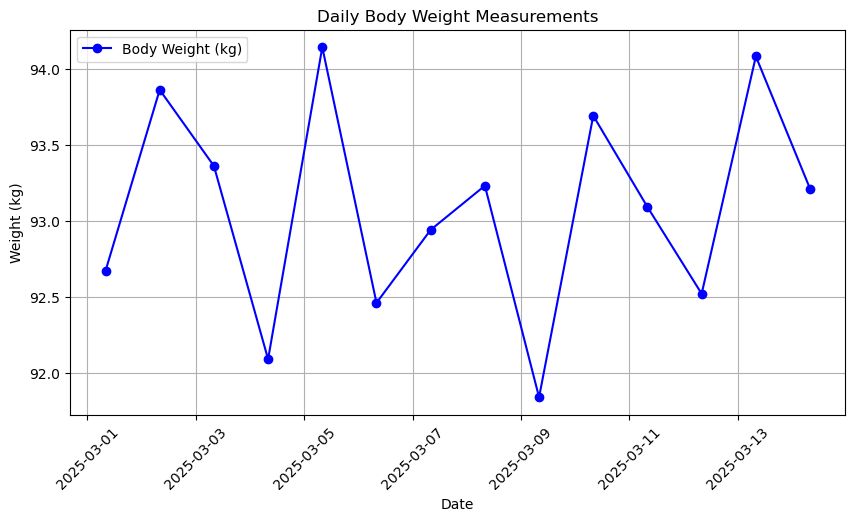

In [50]:
import matplotlib.pyplot as plt

# Extract weights and dates
weights, dates = zip(*parsed_data)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dates, weights, marker="o", linestyle="-", color="b", label="Body Weight (kg)")

# Format the plot
plt.xlabel("Date")
plt.ylabel("Weight (kg)")
plt.title("Daily Body Weight Measurements")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Create alert function, if weight on one day is greater than 1.5 kg from the previos create and alert

In [51]:
def check_weight_change(x, y):
    """
    Checks if weight increased by 1.5 kg or more between two consecutive days.
    
    Parameters:
        x (float): Weight on day 1.
        y (float): Weight on day 2.
    
    Returns:
        str: "Alert, major weight change" if the increase is ≥ 1.5 kg, else an empty string.
    """
    if y - x >= 1.5:
        return "Alert, major weight change"
    return ""


Now, we'll loop through the list and compare each day to the previous day

In [52]:
def check_weight_series(weights):
    """
    Applies `check_weight_change` function to an entire series of weights.
    
    Parameters:
        weights (list of float): List of daily weights.
    
    Returns:
        list of str: Alerts corresponding to each day comparison.
    """
    alerts = []
    for i in range(1, len(weights)):  # Start from second day
        alert = check_weight_change(weights[i - 1], weights[i])
        alerts.append(alert)
    return alerts


In [54]:
# Extract weights and dates
weights, dates = zip(*parsed_data)
weight_series = weights
# Run the function
alerts = check_weight_series(weight_series)

# Print results
for i, alert in enumerate(alerts, start=2):  # Start from Day 2
    if alert:
        print(f"Day {i}: {alert}")

Day 5: Alert, major weight change
Day 10: Alert, major weight change
Day 13: Alert, major weight change


In [191]:
url="http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Patient?_has:Procedure:subject:code=http://snomed.info/sct|387713003&_revinclude=Observation:subject"

In [203]:
response = requests.get(url, headers=headers, auth=HTTPBasicAuth('_System', 'ISCDEMO'))
# Check if the request was successful
if response.status_code == 200:
    bundle = response.json()
    print("Bundle retrieved successfully!")
else:
    print("Failed to retrieve bundle")

Bundle retrieved successfully!


In [204]:
print(bundle)

{'resourceType': 'Bundle', 'id': '4b06f0ad-041f-11f0-9076-0242c0a8cc22', 'type': 'searchset', 'timestamp': '2025-03-18T17:34:49Z', 'total': 5, 'link': [{'relation': 'self', 'url': 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Patient?_has:Procedure:subject:code=http%3A%2F%2Fsnomed.info%2Fsct%7C387713003&_revinclude=Observation%3Asubject'}], 'entry': [{'fullUrl': 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Patient/70277', 'resource': {'resourceType': 'Patient', 'name': [{'family': 'Smith', 'given': ['John']}], 'gender': 'male', 'birthDate': '1980-05-15', 'id': '70277', 'meta': {'lastUpdated': '2025-03-16T13:37:01Z', 'versionId': '1'}}, 'search': {'mode': 'match'}}, {'fullUrl': 'http://127.0.0.1:8080/csp/healthshare/demo/fhir/r4/Patient/70279', 'resource': {'resourceType': 'Patient', 'name': [{'family': 'Johnson', 'given': ['Emma']}], 'gender': 'female', 'birthDate': '1975-09-23', 'id': '70279', 'meta': {'lastUpdated': '2025-03-16T13:37:01Z', 'versionId': '1'}}, 'search': {

In [206]:
expression = "entry.resource.ofType(Observation).where(code.coding.code = '8310-5' or code.coding.code = '6690-2').select(subject.reference.replace('Patient/', '') + ' | ' + code.coding.code + ' | ' + valueQuantity.value.toString() "
result = evaluate(bundle, expression, [])
print(result)

['70277 | 8310-5 | 39.5', '70277 | 6690-2 | 15.0', '70283 | 8310-5 | 39.2', '70283 | 6690-2 | 14.8', '70285 | 8310-5 | 37.1', '70285 | 6690-2 | 7.2']


In [195]:
expression = "entry.resource.ofType(Observation).where(code.coding.code = '8310-5' or code.coding.code = '6690-2').select(subject.reference.replace('Patient/', '') + ' | ' + code.coding.code + ' | ' + valueQuantity.value.toString() + ' | ' + effectiveDateTime)"
result = evaluate(bundle, expression, [])
print(result)

['70277 | 8310-5 | 39.5 | 2025-03-16T10:00:00Z', '70277 | 6690-2 | 15.0 | 2025-03-16T10:00:00Z', '70283 | 8310-5 | 39.2 | 2025-03-16T10:45:00Z', '70283 | 6690-2 | 14.8 | 2025-03-16T10:45:00Z', '70285 | 8310-5 | 37.1 | 2025-03-16T11:00:00Z', '70285 | 6690-2 | 7.2 | 2025-03-16T11:00:00Z']


In [200]:
modifiedexpression = "entry.resource.ofType(Observation).select(subject.reference.replace('Patient/', '') + ' | ' + code.coding.code + ' | ' + valueQuantity.value.toString() "
result = evaluate(bundle, modifiedexpression, [])
print(result)

['70277 | 8310-5 | 39.5', '70277 | 6690-2 | 15.0', '70283 | 8310-5 | 39.2', '70283 | 6690-2 | 14.8', '70285 | 8310-5 | 37.1', '70285 | 6690-2 | 7.2']


In [201]:
idexpression = "entry.resource.ofType(Observation).select(subject.reference.replace('Patient/', ''))"

In [198]:
result = evaluate(bundle, idexpression, [])
print(result)

['70277', '70277', '70283', '70283', '70285', '70285']


In [199]:
ptexpression = "entry.resource.ofType(Patient).id"
result = evaluate(bundle, ptexpression, [])
print(result)

['70277', '70279', '70281', '70283', '70285']


In [170]:
resourcesexp = "entry.resource.resourceType"

In [171]:
result = evaluate(bundle, resourcesexp, [])
print(result)

['Patient', 'Patient', 'Patient', 'Patient', 'Patient', 'Observation', 'Observation', 'Observation', 'Observation', 'Observation', 'Observation', 'Observation', 'Observation']


In [175]:
ptexpression = "entry.resource.ofType(Patient).id"
result = evaluate(bundle, ptexpression, [])
print(result)

['70277', '70279', '70281', '70283', '70285']


In [127]:
obsexpression = "entry.resource.ofType(Observation).select(code.coding.code + ' | ' + subject.reference)"

In [129]:
result = evaluate(bundle, obsexpression, [])
print(result)

['8310-5 | Patient/70277', '6690-2 | Patient/70277', '8310-5 | Patient/70279', '6690-2 | Patient/70279', '8310-5 | Patient/70283', '6690-2 | Patient/70283', '8310-5 | Patient/70285', '6690-2 | Patient/70285']
